# Neural Network Model

### General Steps 

1. Import Data
2. Clean Data
3. Split data into testing/training splits
4. Create a model 
5. Train the model 
6. Make predictions
7. Evaluate and improve 

## Importing Data

In [2]:
# requirments 
import math
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM 
import matplotlib.pyplot as plt 
plt.style.use("fivethirtyeight")



In [3]:
df = pd.read_csv("@MES00_Micro-e-mini-S&P_5min_20years.txt")
print(df)


               Date   Time     Open     High      Low    Close   Up  Down
0        09/11/1997  03:35  1033.25  1033.25  1030.75  1030.75    5     0
1        09/11/1997  04:50  1030.25  1030.25  1030.25  1030.25    1     0
2        09/11/1997  07:10  1029.75  1029.75  1029.50  1029.50    3     0
3        09/11/1997  07:15  1029.50  1029.50  1029.00  1029.00    2     0
4        09/11/1997  07:25  1029.00  1029.25  1028.50  1028.50    7     0
...             ...    ...      ...      ...      ...      ...  ...   ...
1534492  08/16/2021  19:50  4465.25  4467.00  4465.25  4466.75  199   257
1534493  08/16/2021  19:55  4466.75  4467.00  4466.25  4466.25  116   272
1534494  08/16/2021  20:00  4466.25  4466.75  4465.75  4466.50  254   299
1534495  08/16/2021  20:05  4466.75  4466.75  4466.00  4466.25  235   148
1534496  08/16/2021  20:10  4466.25  4466.50  4466.00  4466.25   72    30

[1534497 rows x 8 columns]


In [4]:
df.shape


(1534497, 8)

In [5]:
df.describe()

,Open,High,Low,Close,Up,Down
count,1.534497e+06,1.534497e+06,1.534497e+06,1.534497e+06,1.534497e+06,1.534497e+06
mean,1.606186e+03,1.606851e+03,1.605518e+03,1.606187e+03,2.199346e+03,2.194902e+03
std,8.197499e+02,8.199624e+02,8.195308e+02,8.197520e+02,4.790837e+03,4.847823e+03
min,4.362500e+02,4.377500e+02,4.355000e+02,4.360000e+02,0.000000e+00,0.000000e+00
25%,1.044000e+03,1.044500e+03,1.043500e+03,1.044000e+03,5.300000e+01,3.000000e+01
50%,1.251250e+03,1.251750e+03,1.250750e+03,1.251250e+03,3.200000e+02,3.040000e+02
75%,2.015750e+03,2.016500e+03,2.015250e+03,2.015750e+03,1.900000e+03,1.894000e+03
max,4.475000e+03,4.476500e+03,4.473750e+03,4.475000e+03,2.209230e+05,1.573790e+05


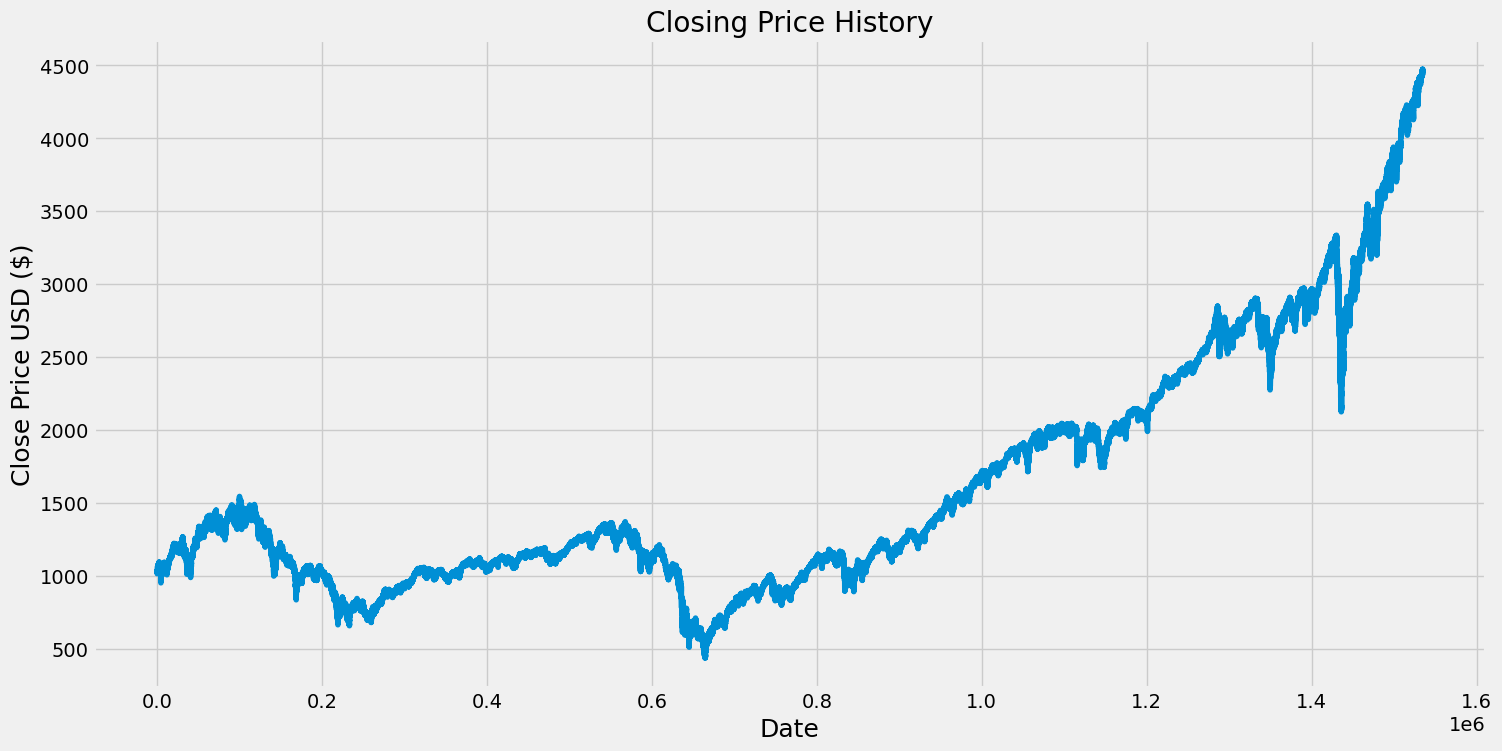

In [6]:
# Visualize the closing price history 
plt.figure(figsize=(16,8))
plt.title("Closing Price History")
plt.plot(df["Close"])
plt.xlabel("Date", fontsize=18)
plt.ylabel("Close Price USD ($)", fontsize=18)
plt.show()

# First Run 

### Clean the Data

In [23]:
drop1 = df.drop(columns=['Open'])
drop2 = drop1.drop(columns=['High'])
drop3 = drop2.drop(columns=['Low'])
drop4 = drop3.drop(columns=['Up'])
clean_data = drop4.drop(columns=['Down'])
print(clean_data)

               Date   Time    Close
0        09/11/1997  03:35  1030.75
1        09/11/1997  04:50  1030.25
2        09/11/1997  07:10  1029.50
3        09/11/1997  07:15  1029.00
4        09/11/1997  07:25  1028.50
...             ...    ...      ...
1534492  08/16/2021  19:50  4466.75
1534493  08/16/2021  19:55  4466.25
1534494  08/16/2021  20:00  4466.50
1534495  08/16/2021  20:05  4466.25
1534496  08/16/2021  20:10  4466.25

[1534497 rows x 3 columns]


In [63]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(clean_data['Close'].values.reshape(-1, 1))




### Split Data

In [65]:
# Getting Counts

roundedFullCount = round(len(scaled_data))
x_test_count = round(len(scaled_data)*0.80)
print(x_test_count)
print(clean_data['Date'][1227598])
split_point = scaled_data[x_test_count]



1227598
03/29/2017


In [66]:
x_train = []
i = 0
stop = False
while(i > x_test_count):
    if(i > x_test_count):
        x_train.append(scaled_data[i].value)
        i = i + 1
    else:
        break;
    
print(x_train)


[]


In [ ]:
for i in roundedFullCount:
    if scaled_data[i] < x_test_count:
        x_train.append(scaled_data[i])